# Tutorial 3b. Multilayer Perceptrons with Auto-differentiation!

- In this tutorial you will train (again) a multilayer perceptron

- But differently from what you did in `tutorial3a`, since this time, you will let the `PyTorch` library do most of the complicated work for you

- The goal of this notebook is to make you get familiar with `PyTorch` and the its main concepts, that we will use repeatedly along the course.

- We will be training a multilayer perceptron on the `CIFAR-10` dataset, a popular dataset of images that is used in Computer-Vision (CV) research

- You will need to use a lot the documentation of `PyTorch` and look at examples for this notebook.

In [2]:
import torch, torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt 

## Load the dataset

- `PyTorch` provides popular computer vision datasets that can be easily downloaded
- The following code will download the `CIFAR-10` dataset for us  
- Since it is computationally expensive to load the entire dataset into memory, we will use `PyTorch`'s dataloaders  before feeding batches of images to the neural network

**QUESTION.** Fill in the next cell

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root = "./data", train = True, download = True, transform = transform)
testset = datasets.CIFAR10(root = "./data", train = False, download = True, transform = transform)

batch_size = 128
# You should use as many cores you have on your laptop
num_workers = 4

# Fill in the options for both data loaders. Warning: the training dataloader should shuffle the data
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = num_workers)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False, num_workers = num_workers)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
img, label = trainset[0]
img.shape

torch.Size([3, 32, 32])

## Visualize the Images of CIFAR-10

* Once everything is properly loaded you should be able to visualize some of the samples of the CIFAR-10

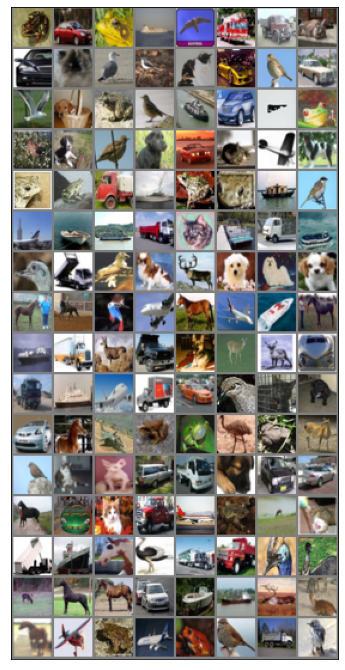

 frog   car  frog  ship  bird truck truck   cat   car   cat  bird  bird   cat   car  bird   car  bird   dog  frog  bird  ship   car plane  frog  deer   dog  bird   dog   car   cat plane   dog  frog  frog truck  ship  frog  frog  ship  bird plane  ship  ship truck   cat  ship truck  ship  bird truck horse   dog  deer   dog   dog   dog horse horse  bird plane horse plane  ship horse  ship truck  deer truck   dog  deer  deer plane truck  ship plane truck   car  bird   cat   dog   car horse plane  frog  frog  bird  frog  deer  bird   cat   cat   car truck   dog   car   car horse   car   cat truck plane  frog  deer   cat truck  ship horse  bird truck truck  bird  bird  deer horse horse   car  ship  ship  deer  deer horse plane  frog plane  frog  bird truck  bird


In [5]:
def show_images(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
show_images(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

## Creating a MLP model and train it

- We are now ready to define all the necessary hyperparameters that are required to construct a proper MLP
- Similarly to what we did in `tutorial03a` we need to explore the data carefully in order to know how to set the following parameters

### Hyperparameters

**QUESTION.** Fill the hyperparameters

In [6]:
input_dim = 32*32*3
hidden_dim = 0
output_dim = 10
learning_rate = 1e-4
num_epochs = 10

### Computation Graph

- You are free to define any kind of architecture that you think is reasonable for the problem of classifying CIFAR-10 images
- By default, you can use a multi-layer perceptron
- The constructor of the neural network will represent the different components of the computation-graph, note that it is very similar to the way we have programmed our own neural network in `tutorial03a`.
- You will also have to define the forward pass yourself.

In [8]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(input_dim, 1024)
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        out = x.view(x.size(0), -1)
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        out = F.relu(out)
        out = self.linear5(out)
        return out

### Create the Network

- You are now ready to create your neural network object
- You will also have to define an appropriate loss function to minimize and an optimization algorithm
- By default, you can use the cross-entropy loss and the RMS prop optimizer

In [9]:
model = Net(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### Train the Network

- Once you have your neural network you just need to train it. 
- You will have to compute the output of the forward pass, compare it to your desired output and update the parameters of the network by backpropagation. 
- Fortunately this time, this only requires less than 5 lines of code in `PyTorch`

In [10]:
def train(num_epochs):
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        correct = 0
        for i, data in enumerate(trainloader, 0):
            features, labels = data
            
        # zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            pred = model(features)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(pred.data, 1)
            
            correct += (predicted == labels).sum().item()            
            epoch_loss += pred.shape[0]*loss.item()
            
        print("Epoch ",epoch+1," Train loss: ", epoch_loss / len(trainset)," Train accuracy:",correct/len(trainset))


In [11]:
train(num_epochs)

Epoch  1  Train loss:  1.8056607264709472  Train accuracy: 0.35238
Epoch  2  Train loss:  1.5354875905990601  Train accuracy: 0.45644
Epoch  3  Train loss:  1.432281612892151  Train accuracy: 0.4982
Epoch  4  Train loss:  1.3501222090911866  Train accuracy: 0.52472
Epoch  5  Train loss:  1.2848423252105712  Train accuracy: 0.54676
Epoch  6  Train loss:  1.226873260269165  Train accuracy: 0.56808
Epoch  7  Train loss:  1.174242010269165  Train accuracy: 0.58784
Epoch  8  Train loss:  1.1193188309478759  Train accuracy: 0.60778
Epoch  9  Train loss:  1.0676680019760132  Train accuracy: 0.62506
Epoch  10  Train loss:  1.0163074311637879  Train accuracy: 0.6439


- Of course, repeated calls to `train` will continue training from where it were
- Training a neural network is a highly iterative process.

## Evaluate the final performance of the Network

- Once you think your network is properly trained, you will test its performance on the testing-set of the CIFAR-10 dataset
- Compute the final accuracy of your model
- You should be able to reach a 50% accuracy with a simple multi-layer perceptron

In [12]:
def test():
    correct = 0
    with torch.no_grad():
        for data in testloader:
            features, labels = data
            pred = model(features)
            _, predicted = torch.max(pred.data, 1)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the test images: %d %%' % (100 * correct / len(testset)))

In [13]:
test()

Accuracy of the network on the test images: 55 %


**Final remark.** Of course, this is far from being the state-of-the-art. Indeed, convolutional neural nets are the backbones for computer vision problems (we will do it in following labs), while we only used here a feed-forward network.

## Redo it using `pytorch-lightning`

There is some boilerplates in pure `PyTorch` code. The `pytorch-lighting` library is a new library allowing to simplify a lot the use of `PyTorch` together with very nice options for faster training and development.

**QUESTION**. Recode your neural network and its training using `pytorch-lightning`.

In [14]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger

In [20]:
class Net(pl.LightningModule):
  
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(), 
            nn.Linear(64, 64),
            nn.ReLU(), 
            nn.Linear(64, output_dim)
        )
        self.ce = nn.CrossEntropyLoss() 
    
    def forward(self, x):
        return self.layers(x)
  
    def training_step(self, batch, batch_idx):
        x, y = batch
        x = x.view(x.size(0), -1)
        y_hat = self.layers(x)
        loss = self.ce(y_hat, y)
        self.log('train_loss', loss)   
        
        # training metrics
        y_hat = torch.argmax(y_hat, dim=1)
        acc = torch.sum(y == y_hat).item() / (len(y) * 1.0)
        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, logger=True)      
        return loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.layers(x)       
        loss = self.ce(y_hat, y)
        
        # validation metrics
        y_hat = torch.argmax(y_hat, dim=1)
        acc = torch.sum(y == y_hat).item() / (len(y) * 1.0)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        return loss
  


#    output = dict({
#         'test_loss': loss,
#         'test_acc': torch.tensor(accuracy),
#     })
#     return output
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr = learning_rate)
        return optimizer
    
if __name__ == '__main__':
    # Init the model
    model = Net(input_dim, hidden_dim, output_dim)
    # Initialize wandb logger
    wandb_logger = WandbLogger(project='wandb-lightning', job_type='train')
    trainer = pl.Trainer(max_epochs=5, progress_bar_refresh_rate=20, logger=wandb_logger)
    
    # Train the model
    trainer.fit(model, trainloader)
    
    # Evaluate the model on the held-out test set
    trainer.test(testloader)

    # Close wandb run
    wandb.finish()

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 3.7 M 
1 | ce     | CrossEntropyLoss | 0     
--------------------------------------------
3.7 M     Trainable params
0         Non-trainable params
3.7 M     Total params
14.837    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

AttributeError: 'DataLoader' object has no attribute 'log'